In [2]:
import numpy as np
from tqdm import tqdm
import torch
import torch.autograd as autograd
import torch.nn.functional as F
import torch.nn as nn

In [82]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = torch.tensor(x_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)

In [83]:
x_train[1].view(28*28)

tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

torch.Size([60000, 28, 28])
(10000, 28, 28)


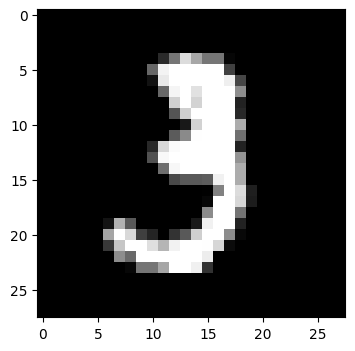

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
print(x_train.shape)
print(x_test.shape)
plt.figure(figsize = (4,4))
plt.imshow(x_train[10], cmap="gray")

In [81]:
permutation = np.array([i for i in range(len(x_train))])
np.random.shuffle(permutation)
x_train = [x_train[i] for i in permutation]
y_train = [y_train[i] for i in permutation]

In [30]:
def batchify_data(x_data, y_data, batch_size):
    """Takes a set of data points and labels and groups them into batches."""
    # Only take batch_size chunks (i.e. drop the remainder)
    N = int(len(x_data) / batch_size) * batch_size
    batches = []
    for i in range(0, N, batch_size):
        batches.append({
            'x': torch.tensor(x_data[i:i+batch_size], dtype=torch.float32),
            'y': torch.tensor(y_data[i:i+batch_size], dtype=torch.long
        )})
    return batches

def compute_accuracy(predictions, y):
    """Computes the accuracy of predictions against the gold labels, y."""
    return np.mean(np.equal(predictions.numpy(), y.numpy()))

In [31]:
def run_epoch(data, model, optimizer):
    """Train model for one pass of train data, and return loss, acccuracy"""
    # Gather losses
    losses = []
    batch_accuracies = []

    # If model is in train mode, use optimizer.
    is_training = model.training

    # Iterate through batches
    for batch in data:
        # Grab x and y
        x, y = batch['x'], batch['y']

        # Get output predictions
        out = model(x)

        # Predict and store accuracy
        predictions = torch.argmax(out, dim=1)
        batch_accuracies.append(compute_accuracy(predictions, y))

        # Compute loss
        loss = F.cross_entropy(out, y)
        losses.append(loss.data.item())

        # If training, do an update.
        if is_training:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Calculate epoch level scores
    avg_loss = np.mean(losses)
    avg_accuracy = np.mean(batch_accuracies)
    return avg_loss, avg_accuracy

In [32]:
def train_model(train_data, dev_data, model, lr=0.01, momentum=0.9, nesterov=False, n_epochs=30):
    """Train a model for N epochs given data and hyper-params."""
    # We optimize with SGD
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov)

    for epoch in range(1, 11):
        print("-------------\nEpoch {}:\n".format(epoch))

        # Run **training***
        loss, acc = run_epoch(train_data, model.train(), optimizer)
        print('Train loss: {:.6f} | Train accuracy: {:.6f}'.format(loss, acc))

        # Run **validation**
        val_loss, val_acc = run_epoch(dev_data, model.eval(), optimizer)
        print('Val loss:   {:.6f} | Val accuracy:   {:.6f}'.format(val_loss, val_acc))
        # Save model
        torch.save(model, 'mnist_model_fully_connected.pt')
    return val_acc

In [1]:
# training the neural net using SDG
batch_size = 32
train_batches = batchify_data(x_train, y_train, batch_size)
test_batches = batchify_data(x_test, y_test, batch_size)

NameError: ignored

In [103]:
#################################
## Model specification TODO
model = nn.Sequential(
          nn.Conv2d(1, 32, (3, 3)),
          nn.ReLU(),
          nn.MaxPool2d((2, 2)),
          # nn.Conv2d(32, 32, (3, 3)),
          # nn.ReLU(),
          # nn.MaxPool2d((2, 2)),
          nn.Flatten(),
          nn.Linear(1164, 128),
          nn.Dropout(),
          nn.Linear(128,10)
        )
##################################

# train_model(train_batches, dev_batches, model, nesterov=True)

# ## Evaluate the model on test data
# loss, accuracy = run_epoch(test_batches, model.eval(), None)

# print ("Loss on test set:"  + str(loss) + " Accuracy on test set: " + str(accuracy))

In [104]:
stepi = []
lossi = []

In [105]:
lr = 0.01
momentum = 0
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, len(x_train), (32,))
  # forward pass
  out = model(torch.tensor(x_train[ix].view(-1, 32, 28*28), dtype=torch.float32))
  loss = F.cross_entropy(out, torch.tensor(y_train[ix], dtype = torch.long))
  
  #update
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  # scheduler.step()

  stepi.append(i)
  lossi.append(loss.log10().data.item())

<ipython-input-105-57a5e42ee6dc>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = model(torch.tensor(x_train[ix].view(-1, 32, 28*28), dtype=torch.float32))
<ipython-input-105-57a5e42ee6dc>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = F.cross_entropy(out, torch.tensor(y_train[ix], dtype = torch.long))


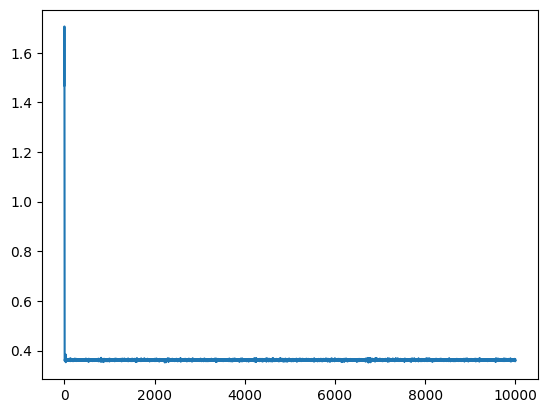

In [106]:
plt.plot(stepi, lossi)